# WeatherPy

Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..." 

But, if pressed, how would you prove it?

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:


     Temperature (F) vs. Latitude
     Humidity (%) vs. Latitude
     Cloudiness (%) vs. Latitude
     Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls. 
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data. 
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.

See Example Solution for a reference on expected format. 





In [23]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from datetime import datetime
from citipy import citipy
import random
import seaborn as sns

In [2]:
api = 'c04248e08f37a494afa5a352d24031b5'
lat = np.random.uniform(-90,90,800)
lng = np.random.uniform(-180,180,800) 

In [3]:
index = np.arange(0, len(lat))
my_cities = pd.DataFrame(index=index)
my_cities["Lat"] = ""
my_cities["Lng"] = ""
my_cities['City'] = ""
my_cities["Temperature"] = ""
my_cities["Humidity"] = ""
my_cities["Cloudiness"] = ""
my_cities["Wind Speed"] = ""

In [4]:
my_cities['Lat'] = lat
my_cities['Lng'] = lng

In [5]:
city_nameS = []
for x in range(len(my_cities)):
    citi = citipy.nearest_city(my_cities['Lat'][x], my_cities['Lng'][x])
    city_name = citi.city_name
    city_nameS.append(city_name)
my_cities["City"] = city_nameS
my_cities.head()

,Lat,Lng,City,Temperature,Humidity,Cloudiness,Wind Speed
0,-47.244243,144.391120,new norfolk,,,,
1,-5.280173,-88.430602,san cristobal,,,,
2,-70.663933,-3.699962,cape town,,,,
3,-4.303610,-134.985828,atuona,,,,
4,2.428685,-3.289398,axim,,,,


In [86]:
url = "http//:api.openweathermap.org/data/2.5/forecast/daily?q=captown&mode=json&cnt=7"
#settings = {"units": "metric", "lang": "DE"}
settings = {"APPID": api, "units": "metric"}

data = ow.get_current("cape town", **settings)



In [7]:
views = {"summary": ["main.temp", "main.humidity","wind.speed" ] }
data(*views["summary"])

(16, 82, 4.1)

In [8]:
for index, row in my_cities.iterrows():
    
    try:
        
        city_info = ow.get_current(row['City'], **settings)
        main_temp = {"summary": ["main.temp" ] }
        temp = city_info(*main_temp["summary"])
        
        main_hum = {"summary": ["main.humidity"] }
        humid = city_info(*main_hum['summary'])
        
        main_wind = {"summary":["wind.speed"]}
        wind = city_info(*main_wind['summary'])
        
        main_cloud = {"summary": ['clouds.all']}
        clouds = city_info(*main_cloud['summary'])
        
        
        my_cities.set_value(index, "Temperature", temp)
        my_cities.set_value(index, "Humidity", humid)
        my_cities.set_value(index, "Wind Speed",wind )
        my_cities.set_value(index, "Cloudiness",clouds)
        
    except:
        continue
my_cities.head()

,Lat,Lng,City,Temperature,Humidity,Cloudiness,Wind Speed
0,-47.244243,144.391120,new norfolk,20,42,75,8.7
1,-5.280173,-88.430602,san cristobal,15.2,100,0,0.41
2,-70.663933,-3.699962,cape town,16,82,0,4.1
3,-4.303610,-134.985828,atuona,26.47,100,68,5.56
4,2.428685,-3.289398,axim,27.2,100,56,3.81


In [82]:
my_cities = my_cities.replace('', np.nan)
my_cities = my_cities.drop_duplicates("City")
my_cities = my_cities.dropna()
my_cities.to_csv("my_cities.csv")

##  Temperature (F) vs. Latitude


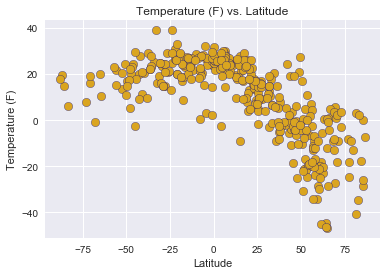

In [87]:
sns.set()
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(x = my_cities['Lat'], y = my_cities['Temperature'], edgecolors="navy", color= 'goldenrod', cmap =True, s = 70 )
plt.show()


## Humidity (%) vs. Latitude
 

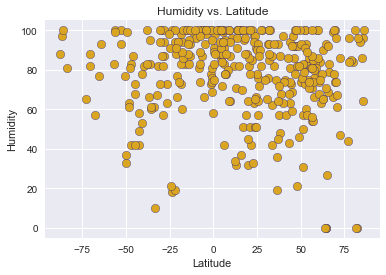

In [78]:
sns.set()
#plt.figure(figsize=(20,10))
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x = my_cities['Lat'], y = my_cities['Humidity'], edgecolors="navy", color= 'goldenrod', cmap =True, s = 70 )
plt.show()

## Cloudiness (%) vs. Latitude


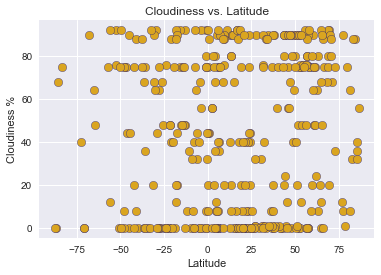

In [79]:
sns.set()
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.scatter(x = my_cities['Lat'], y = my_cities['Cloudiness'], edgecolors="navy", color= 'goldenrod', cmap =True, s = 70 )
plt.show()

## Wind Speed (mph) vs. Latitude


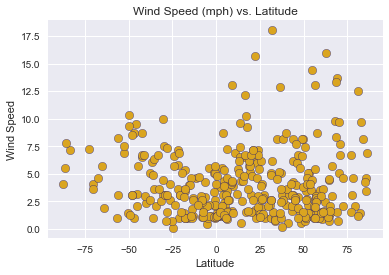

In [80]:
sns.set()
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x = my_cities['Lat'], y = my_cities['Wind Speed'], edgecolors="navy", color= 'goldenrod', cmap =True, s = 70 )
plt.show()